<div class="alert alert-block alert-info">
Visit the <a href="https://github.com/engs1258/biomedical-image-analysis-notebooks/wiki">wiki</a> pages to find some additional documentation and instructions on how view an interactive verson of these notebooks using binder.</div>

---

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from scipy import fftpack
from skimage import data
from skimage import io
from skimage.transform import pyramid_laplacian

## Magnitude and phase of the Fourier transform

The Fourier transform consists of real and imaginary parts 

$$ F = F_R + i F_I$$

We can analyse the magnitude $|F|$ and the phase of the transform.  

In [3]:
def computeMagnitudeSpectrum(image):
    F1 = fftpack.fft2(image)
    # Now shift the quadrants around so that low spatial frequencies are in
    # the center of the 2D fourier transformed image.
    F2 = fftpack.fftshift( F1 )
 
    # Calculate a 2D power spectrum
    #psd2D = np.abs( F2 )**2
    ms = 20*np.abs(F2)
    
    return ms


def computePhaseSpectrum(image):
    F1 = fftpack.fft2(image)
    # Now shift the quadrants around so that low spatial frequencies are in
    # the center of the 2D fourier transformed image.
    F2 = fftpack.fftshift( F1 )
 
    # Calculate a 2D power spectrum
    #psd2D = np.abs( F2 )**2
    ps = np.angle(F2)
    
    return ps

## Example1: CT image of Lyuba

In [4]:
image = io.imread("../images/Lyuba-CT_350.tif")
rows, cols = image.shape

In [5]:
ms = computeMagnitudeSpectrum(image)
ps = computePhaseSpectrum(image)

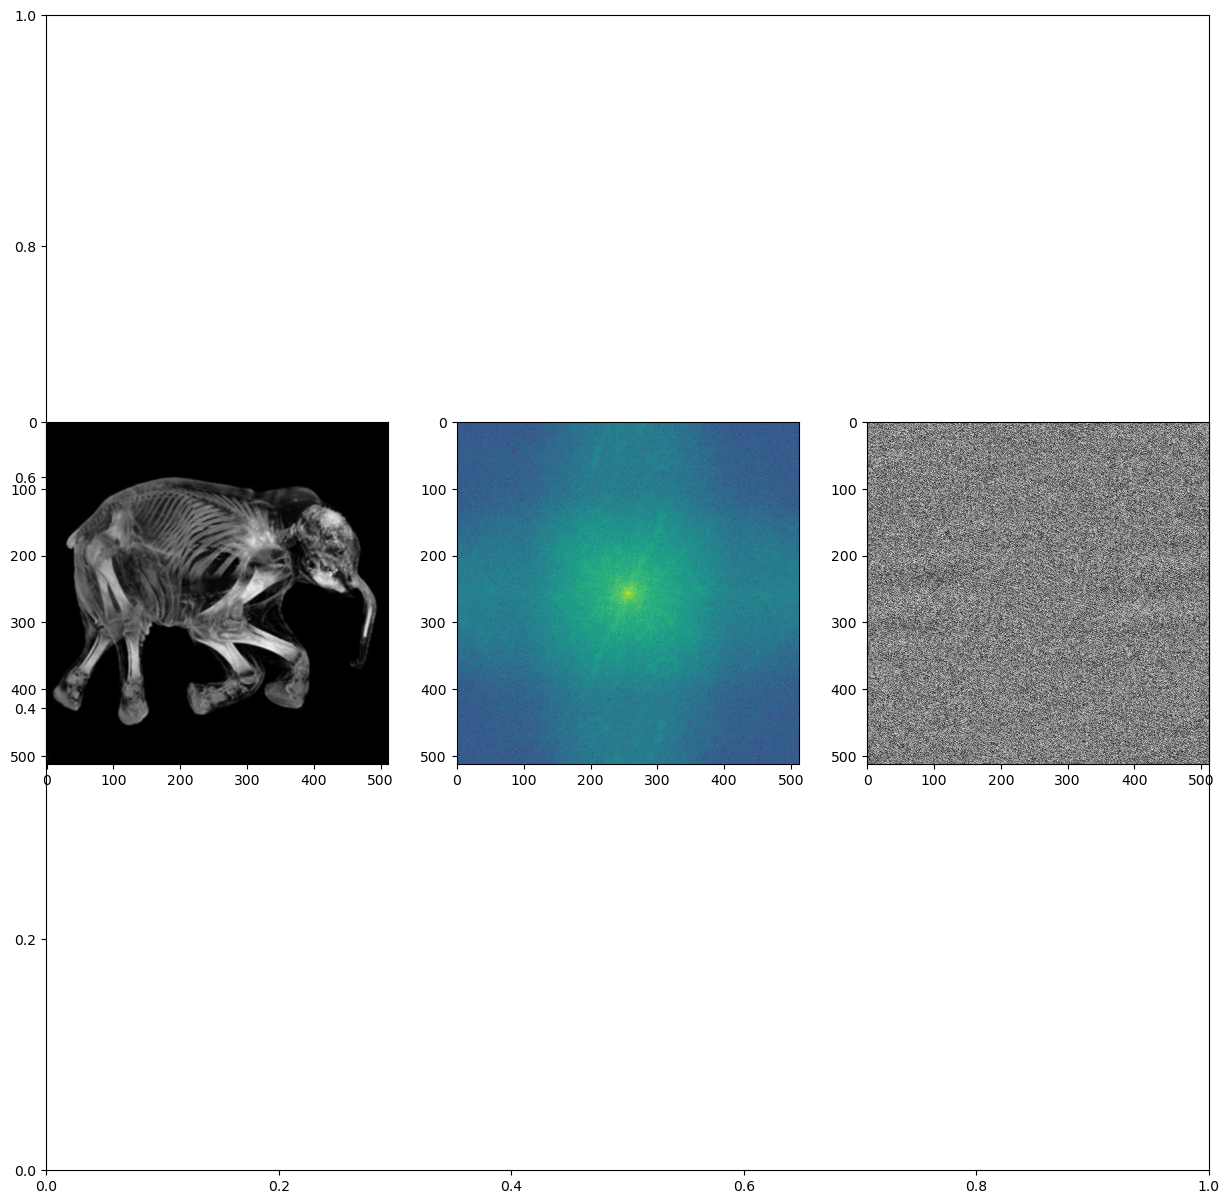

In [6]:
fig, ax = plt.subplots(figsize=(15, 15))
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.subplot(1, 3, 2)
plt.imshow(np.log10( ms ))
plt.subplot(1, 3, 3)
plt.imshow(ps, cmap='gray')
plt.show()

##  Example 2: Power spectum of microscopy image

In [7]:
image = io.imread("../images/AS_09125.tif")
rows, cols = image.shape

In [8]:
ms = computeMagnitudeSpectrum(image)
ps = computePhaseSpectrum(image)

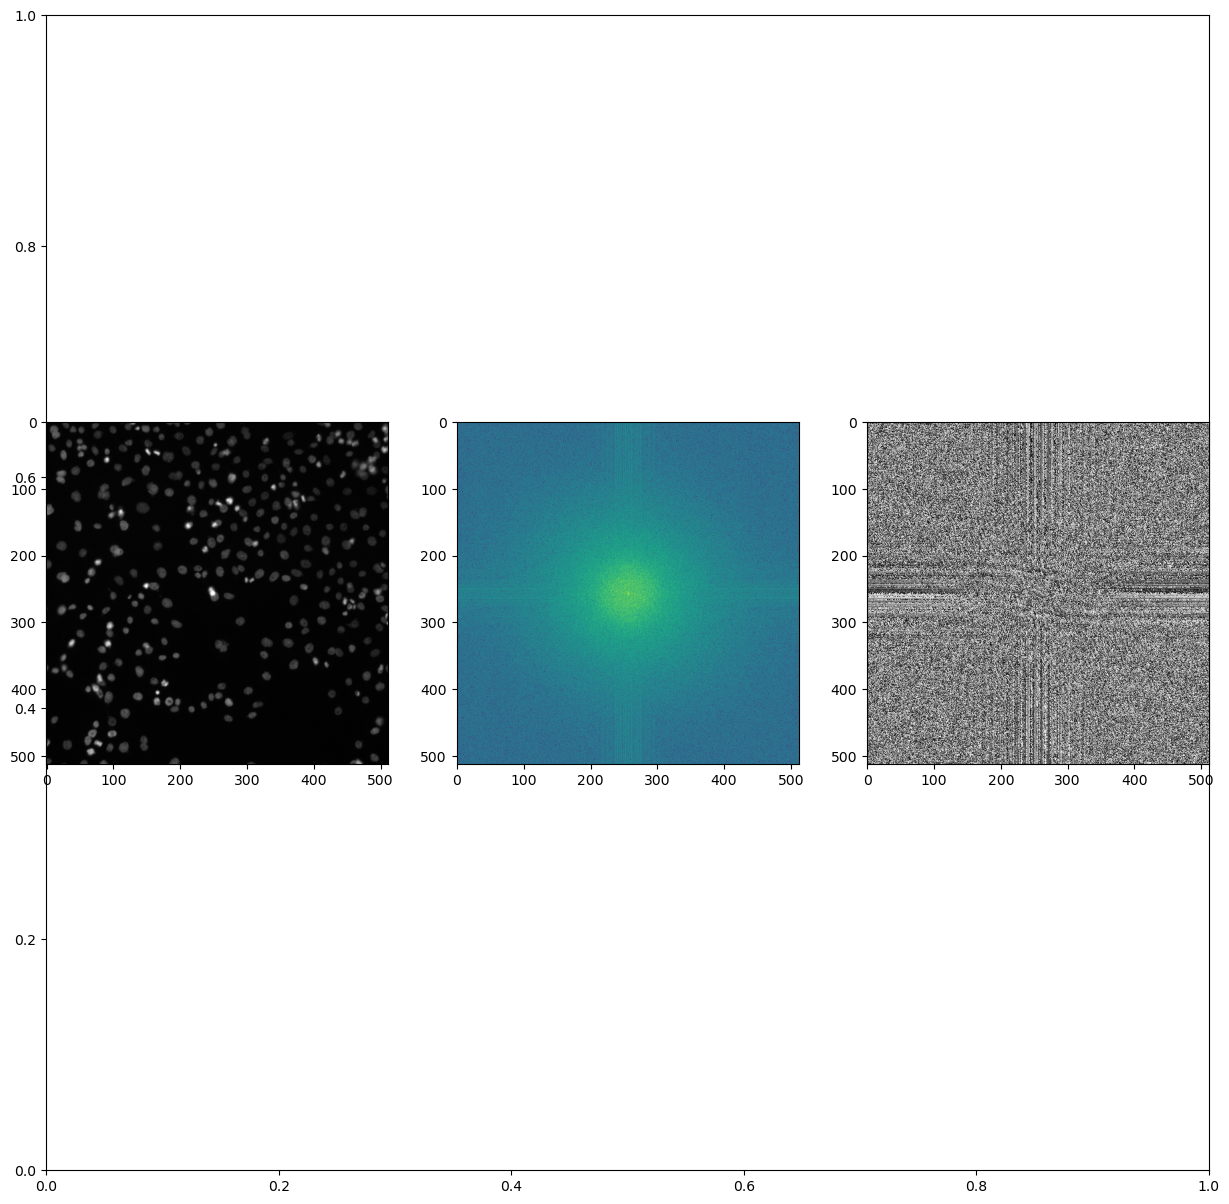

In [9]:
fig, ax = plt.subplots(figsize=(15, 15))
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.subplot(1, 3, 2)
plt.imshow(np.log10( ms ))
plt.subplot(1, 3, 3)
plt.imshow(ps, cmap='gray')
plt.show()